## Momentum Optimization

Ref: https://distill.pub/2017/momentum/

Ref: https://en.wikipedia.org/wiki/Moving_average

Gradient Descent takes small regular steps down the slope, so it'll take a lot of time to reach the minumum. Gradient Descent updates the weights $\theta$ by subtracting the gradient of the cost function $J(\theta)$ with respect to the weights multiplied by the learning rate. Note that Gradient Descent pays no attention to the previous gradients. If the local gradient is small, Gradient Descent goes very slowly.

Momentum optimization, on the other hand, pays a great attention to previous gradients. At each iteration, it maintains a momentum vector $m$ by adding local gradients to this vector. At each iteration, it subtracts the local gradient (multiplied by the learning rate) from the vector $m$. It then updates the weights by adding this momentum vector to the current weights.

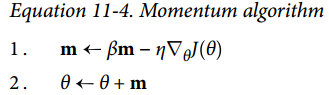

In [1]:
from IPython.display import Image
Image(filename='images/momentum.png')

In Momentum optimization, the gradient is used as an acceleration not a speed.

To prevent the momentum from growing too large, we use a hyperparameter $\beta$ (called momentum) which receives a value between 0 and 1 (generally $\beta$ is set to 0.9). If $\beta$ is equal to 0, then Momentum becomes the normal Gradient Descent (high friction). If $\beta$ is close to 1 (no friction), then Momentum goes much faster than normal Gradient Descent.

If the gradient remains constant, the terminal velocity is equal to $(1 \space / \space (1 \space - \space \beta)) \space * \space \eta \nabla_\theta J(\theta)$. If $\beta$ = 0.9, the terminal velocity is equal to $10 \space * \space \eta \nabla_\theta J(\theta)$, Momentum optimization would go 10 times faster than Gradient Descent (1000 times if $\beta = 0.999$). This characteristic allows Momentum optimization to escape from plateaus much faster than Gradient Descent.

When input features have very different scales (the cost looks like a elongated bowl), Gradient Descent goes down the steep slope quite fast, but it's very slow when going down the valley. Momentum, on the other hand, can accelerate itself when going to the bottom of valley (the optimum).

In DNN which doesn't use Batch Normalization, the upper layers often end up having inputs with very different scales, using Momentum can be a solution for this problem (it can also escapes the local minimum)

Momentum optimization may overshoot multiple times through its steps (like pendulum oscillation) before stabilizing at the minimum. That's why we use $\beta$ hyperparameter to introduce a bit of friction in the system to reduce the overshooting duration and speed up convergence.

A drawback of Momentum optimization is that it introduces a new hyperparameter - $\beta$ for tuning. However, in real-life problems this value is usually set to 0.9, and it works well in lots of problems. Generally, Momentum optimization is faster when reaching to the minimum than Gradient Descent.

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.reset_default_graph()
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

In [4]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [5]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xen = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xen, name="loss")

with tf.name_scope("train"):
    # Using Momentum optimizer rather than Gradient Descent optimizer
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [6]:
init = tf.global_variables_initializer()
n_epochs = 100
batch_size = 100
mnist = input_data.read_data_sets("/tmp/data/")

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(mnist.test.labels) // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Test accuracy:", acc_test)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0 Test accuracy: 0.8892
1 Test accuracy: 0.9034
2 Test accuracy: 0.9158
3 Test accuracy: 0.9196
4 Test accuracy: 0.9241
5 Test accuracy: 0.9259
6 Test accuracy: 0.9303
7 Test accuracy: 0.9382
8 Test accuracy: 0.9368
9 Test accuracy: 0.9418
10 Test accuracy: 0.9428
11 Test accuracy: 0.9456
12 Test accuracy: 0.9462
13 Test accuracy: 0.9505
14 Test accuracy: 0.9524
15 Test accuracy: 0.9512
16 Test accuracy: 0.9552
17 Test accuracy: 0.9562
18 Test accuracy: 0.9582
19 Test accuracy: 0.9601
20 Test accuracy: 0.9606
21 Test accuracy: 0.96
22 Test accurac